In [210]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [211]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [212]:
from tensorflow.keras.datasets import mnist

In [213]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [214]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


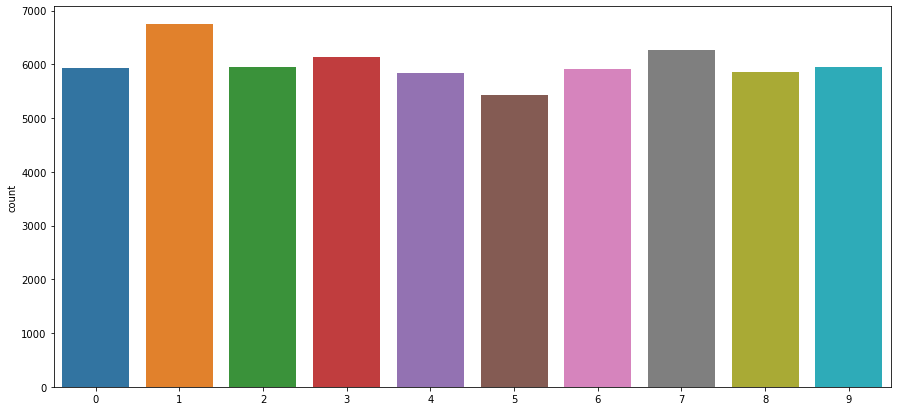

In [215]:
plt.figure(figsize=(15,7))
a = sns.countplot(trainY)

In [216]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [217]:
trainX = np.reshape(trainX, (60000, 784))

In [218]:
trainX.shape

(60000, 784)

In [219]:
trainX = pd.DataFrame(trainX)

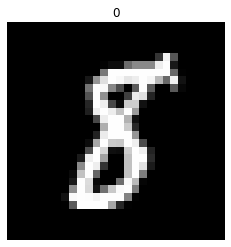

In [220]:
img = trainX.iloc[125].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(trainX.iloc[125,0])
plt.axis("off")
plt.show()

In [221]:
trainX.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
trainX.shape

(60000, 784)

In [223]:
testX = np.reshape(testX, (10000, 784))

In [224]:
testX = pd.DataFrame(testX)

In [225]:
print(trainX.shape)
print(testX.shape)

(60000, 784)
(10000, 784)


In [226]:
trainX = trainX / 255.0
testX = testX / 255.0

In [227]:
trainX = trainX.values.reshape(-1,28,28,1)
testX = testX.values.reshape(-1,28,28,1)
print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [228]:
from keras.utils.np_utils import to_categorical
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

In [229]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [230]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(trainX, trainY, test_size=0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


In [231]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "Same",
                activation = "relu", input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 8, kernel_size = (3,3), padding = "Same",
                activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [232]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [233]:
epoch = 10
batch_size = 250

In [234]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [235]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                             epochs=epoch, validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/10
216/216 [==============================] - 37s 166ms/step - loss: 2.2235 - accuracy: 0.1777 - val_loss: 1.8134 - val_accuracy: 0.3127
Epoch 2/10
216/216 [==============================] - 35s 164ms/step - loss: 1.9049 - accuracy: 0.3188 - val_loss: 1.0941 - val_accuracy: 0.7220
Epoch 3/10
216/216 [==============================] - 35s 162ms/step - loss: 1.7011 - accuracy: 0.4048 - val_loss: 0.7612 - val_accuracy: 0.8270
Epoch 4/10
216/216 [==============================] - 35s 164ms/step - loss: 1.5934 - accuracy: 0.4473 - val_loss: 0.6165 - val_accuracy: 0.8517
Epoch 5/10
216/216 [==============================] - 35s 161ms/step - loss: 1.5335 - accuracy: 0.4685 - val_loss: 0.5263 - val_accuracy: 0.8615
Epoch 6/10
216/216 [==============================] - 35s 163ms/step - loss: 1.4794 - accuracy: 0.4924 - val_loss: 0.4740 - val_accuracy: 0.8758
Epoch 7/10
216/216 [==============================] - 35s 163ms/step - loss: 1.4358 - accuracy: 0.5054 - val_loss: 0.4157 - val_ac

313/313 [==============================] - 3s 8ms/step


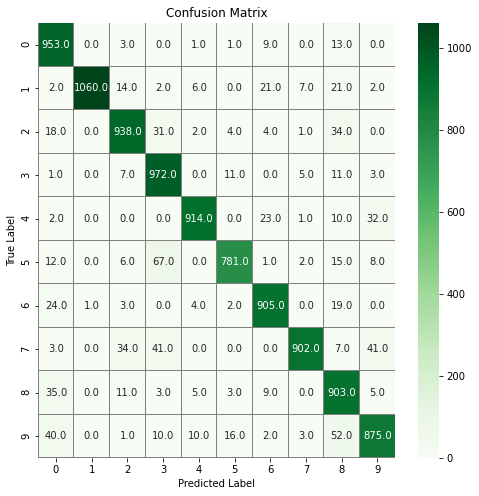

In [236]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()